In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

In [2]:
df = pd.read_excel("https://github.com/chris1610/pbpython/blob/master/data/sample-salesv3.xlsx?raw=true")
df.head()

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


In [3]:
top_10 = (df.groupby('name')['quantity', 'ext price'].agg({'ext price': 'sum', 'quantity': 'count'}).sort_values(by='ext price', ascending=False))[:10].reset_index()
top_10.rename(columns={'name': 'Name', 'ext price': 'Sales', 'quantity': 'Purchases'}, inplace=True)

In [4]:
top_10

,Name,Sales,Purchases
0,Kulas Inc,137351.96,94
1,White-Trantow,135841.99,86
2,Trantow-Barrows,123381.38,94
3,Jerde-Hilpert,112591.43,89
4,"Fritsch, Russel and Anderson",112214.71,81
5,Barton LLC,109438.50,82
6,Will LLC,104437.60,74
7,Koepp Ltd,103660.54,82
8,"Frami, Hills and Schmidt",103569.59,72
9,Keeling LLC,100934.30,74


In [5]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

In [6]:
plt.style.use('ggplot')

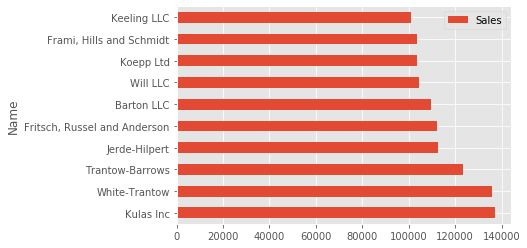

In [7]:
top_10.plot(kind='barh', y='Sales', x='Name')

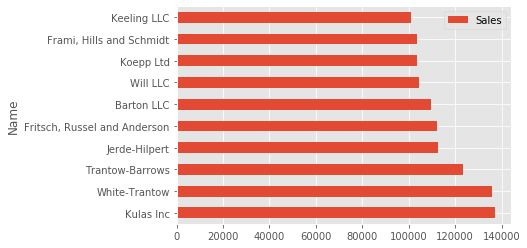

In [8]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)

[Text(0, 0.5, 'Customer'),
 (-10000, 140000),
 Text(0.5, 0, 'Total Revenue'),
 Text(0.5, 1.0, '2014 Revenue')]

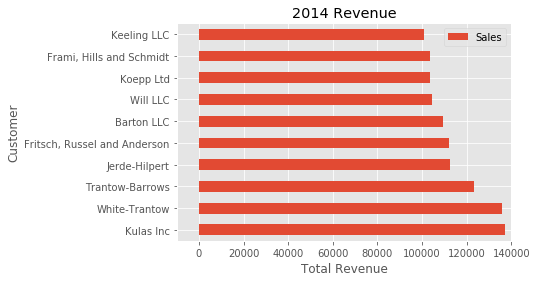

In [9]:
fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set(title='2014 Revenue', ylabel='Customer', xlabel='Total Revenue', xlim=[-10000, 140000])

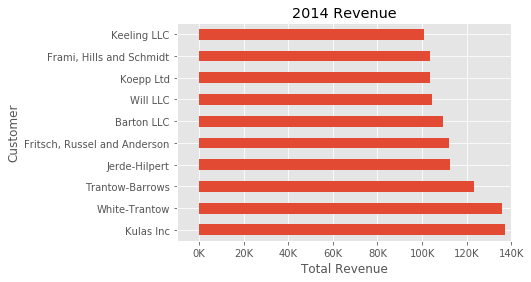

In [11]:
def currency(x, pos):
    if x >= 1000000:
        return '{:1.0f}M'.format(x*1e-6)
    return '{:1.0f}K'.format(x*1e-3)

fig, ax = plt.subplots()
top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
ax.set(title='2014 Revenue', ylabel='Customer', xlabel='Total Revenue', xlim=[-10000, 140000])
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

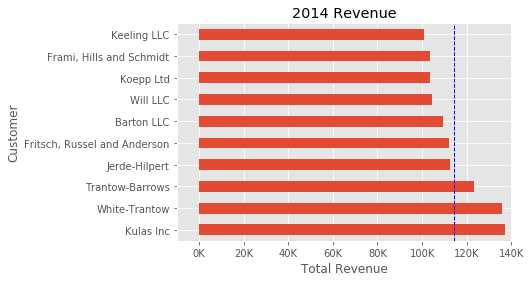

In [13]:
fig, ax = plt.subplots()

top_10.plot(kind='barh', y='Sales', x='Name', ax=ax)
avg = top_10['Sales'].mean()

ax.set(title='2014 Revenue', ylabel='Customer', xlabel='Total Revenue', xlim=[-10000, 140000])
formatter = FuncFormatter(currency)
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(False)

ax.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

Text(0.5, 0.98, '2014 Sales Analysis')

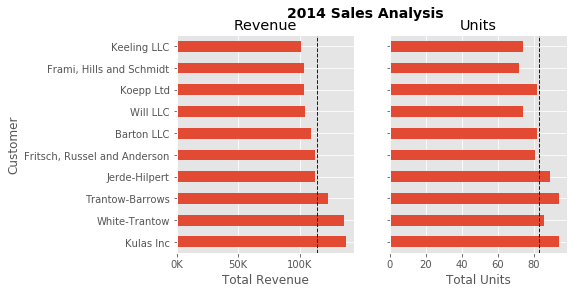

In [20]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(7, 4))

top_10.plot(kind='barh', y='Sales', x='Name', ax=ax0)
ax0.set(title='Revenue', ylabel='Customer', xlabel='Total Revenue')
avg = top_10['Sales'].mean()
ax0.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)

formatter = FuncFormatter(currency)
ax0.xaxis.set_major_formatter(formatter)
ax0.legend().set_visible(False)

top_10.plot(kind='barh', y='Purchases', x='Name', ax=ax1)
ax1.set(title='Units', ylabel='Customer', xlabel='Total Units')
avg = top_10['Purchases'].mean()
ax1.axvline(x=avg, color='b', label='Average', linestyle='--', linewidth=1)
ax1.legend().set_visible(False)

fig.suptitle('2014 Sales Analysis', fontsize=14, fontweight='bold')

In [19]:
fig.canvas.get_supported_filetypes()

{'ps': 'Postscript',
 'eps': 'Encapsulated Postscript',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}